<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/NN_pathway_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np

file = files.upload()

Saving Fall2019_to_Winter2020.xlsx to Fall2019_to_Winter2020.xlsx


In [2]:
sheet1 = pd.read_excel("Fall2019_to_Winter2020.xlsx", sheet_name= "Fall 2019 First semester", na_values= ["X", "?"])
sheet2 = pd.read_excel("Fall2019_to_Winter2020.xlsx", sheet_name= "Fall 2019 22nd snapshot", na_values= ["X", "?"])
sheet3 = pd.read_excel("Fall2019_to_Winter2020.xlsx", sheet_name= "Winter 2020 Second semester", na_values= ["X", "?"])
sheet4 = pd.read_excel("Fall2019_to_Winter2020.xlsx", sheet_name= "Winter 2020 22nd snapshot", na_values= ["X", "?" ])

In [4]:
sheet1.columns = map(str.lower, sheet1.columns)
sheet2.columns = map(str.lower, sheet2.columns)
sheet3.columns = map(str.lower, sheet3.columns)
sheet4.columns = map(str.lower, sheet4.columns)

In [5]:
sheet2 = sheet2[sheet2.course_id.isin([651,667])]
sheet2 = sheet2[sheet2.term_id == 919]
sheet2 = sheet2[sheet2.status_id == 1]

sheet4 = sheet4[sheet4.course_id.isin([652,668])]
sheet4 = sheet4[sheet4.term_id == 1950]
sheet4 = sheet4[sheet4.status_id == 1]

In [95]:
fall19 = sheet1.merge(sheet2, on = "person_id", how = "left")
winter20 = sheet3.merge(sheet4, on = "person_id", how = "left")

In [96]:
fall19.head()

,person_id,snapshot_term,snapshot_type,start_term,relative_term,program,track,cce,path,preferred_name,last_name,first_name,email,alternate_email,cell_phone,home_phone,location,site,gathering_type,date,area,area_abv,dom_int,domestic,area_manager,initials,gender,birth_date,age,age_group,church_member,release_date,rm,marriage_status,state,country,ward_unit_number,unit_name,parent_unit_name,coordinating_council,snap_rmrelease_delta_months,rm_last_5_years,retention,canvas_course_enrollment_id,canvas_course_id,term_id,status_id,course_id,grade,created_date,created_by,modified_date,modified_by,grade_percent,total_time,num_submissions,last_login_date
0,20110580,Fall 2019,Day 22,Fall 2019,1st,Standard,Standard 18+,1,Path 2,Alisha,Smith,Alisha Sophia,asmithmt@gmail.com,smitho77@yahoo.com,7195803858,7195806270,Alamosa CO Site-Stake Center Building,Big Sky Zone,Building,2019-10-07,North America Central,NA Central,Domestic,1,Joseph Sybrowsky,JS,F,1984-06-19,35.0,31+,Member,NaT,Not RM,M,Colorado,United States,129194.0,Alamosa 3rd Ward,Alamosa Colorado Stake,Colorado Colorado Springs Area Coordinating Co...,NaN,NaN,1,164251.0,59466.0,919.0,1.0,651.0,A,2019-08-30 22:43:05.553,api,2019-10-06 08:16:56.577,api,99.43,60829.0,0.0,2019-10-06 04:51:47
1,20125822,Fall 2019,Day 22,Fall 2019,1st,Standard,Standard 18+,1,Path 2,Lori Lee,Williams,Lori Lee,williams6554@outlook.com,NaN,719-588-6791,7195881683,Alamosa CO Site-Stake Center Building,Big Sky Zone,Building,2019-10-07,North America Central,NA Central,Domestic,1,Joseph Sybrowsky,JS,F,1969-03-29,51.0,31+,Member,NaT,Not RM,M,Colorado,United States,452254.0,Alamosa 4th Ward,Alamosa Colorado Stake,Colorado Colorado Springs Area Coordinating Co...,NaN,NaN,1,167818.0,59600.0,919.0,1.0,651.0,B+,2019-09-04 00:51:42.463,api,2019-10-06 08:16:56.580,api,87.50,138702.0,0.0,2019-10-06 00:41:14
2,20016522,Fall 2019,Day 22,Fall 2019,1st,Standard,Standard 18+,1,Path 2,KrisAnna,Williams,Kris Anna,kilika82@gmail.com,kilika82@yahoo.com,7192745843,7195804158,Alamosa CO Site-Stake Center Building,Big Sky Zone,Building,2019-10-07,North America Central,NA Central,Domestic,1,Joseph Sybrowsky,JS,F,1962-11-24,57.0,31+,Member,NaT,Not RM,M,Colorado,United States,36536.0,La Jara 1st Ward,Manassa Colorado Stake,Colorado Colorado Springs Area Coordinating Co...,NaN,NaN,1,164249.0,59462.0,919.0,1.0,651.0,A,2019-08-30 22:42:59.973,api,2019-10-06 08:16:56.570,api,98.39,199936.0,0.0,2019-10-04 16:00:03
3,20123401,Fall 2019,Day 22,Fall 2019,1st,Standard,Standard 18+,1,Path 2,Kraig,Fairhurst,Kraig Matthew,kraigf@yahoo.com,NaN,7192986310,NaN,Alamosa CO Site-Stake Center Building,Big Sky Zone,Building,2019-10-07,North America Central,NA Central,Domestic,1,Joseph Sybrowsky,JS,M,1967-06-23,52.0,31+,Member,NaT,Not RM,M,Colorado,United States,128279.0,Sanford 2nd Ward,Manassa Colorado Stake,Colorado Colorado Springs Area Coordinating Co...,NaN,NaN,1,165411.0,59228.0,919.0,1.0,651.0,A,2019-08-31 20:31:31.723,api,2019-10-07 08:16:14.890,api,99.27,72100.0,0.0,2019-10-07 01:34:08
4,20109281,Fall 2019,Day 22,Fall 2019,1st,Standard,Standard 18-30,1,Path 2,Christian,Hayward,Christian Thomas,chriscth94@gmail.com,chriscth10324@gmail.com,7138827431,7138984336,Alamosa CO Site-Stake Center Building,Big Sky Zone,Building,2019-10-07,North America Central,NA Central,Domestic,1,Joseph Sybrowsky,JS,M,1994-03-24,26.0,18-30,Member,NaT,Not RM,M,Colorado,United States,158631.0,Del Norte Branch,Alamosa Colorado Stake,Colorado Colorado Springs Area Coordinating Co...,NaN,NaN,0,164243.0,59438.0,919.0,1.0,651.0,A-,2019-08-30 22:42:17.030,api,2019-10-06 08:16:56.577,api,92.32,36717.0,0.0,2019-10-06 04:48:44


In [97]:
fall19 = fall19[["program","gathering_type","area","dom_int","area_manager","gender","age","marriage_status","church_member", "rm", "grade_percent","total_time","retention"]]

In [98]:
fall19.dtypes

program             object
gathering_type      object
area                object
dom_int             object
area_manager        object
gender              object
age                float64
marriage_status     object
church_member       object
rm                  object
grade_percent      float64
total_time         float64
retention            int64
dtype: object

In [99]:
fall19.isnull().sum(axis = 0)/fall19.shape[0] * 100

program            0.000000
gathering_type     0.000000
area               0.000000
dom_int            0.000000
area_manager       0.000000
gender             0.065219
age                0.102488
marriage_status    7.053014
church_member      0.037268
rm                 0.037268
grade_percent      7.612038
total_time         7.612038
retention          0.000000
dtype: float64

In [52]:
'''
fall19.gender = fall19.gender.apply(lambda x: "unknown" if x == "None" else x)
fall19.age = fall19.age.apply(lambda x: mean(x) if x == "None" else x)
fall19.marriage_status = fall19.marriage_status.apply(lambda x: "unknown" if x == "None" else x)
fall19.grade_percent = fall19.grade_percent.apply(lambda x: mean(x) if x == "None" else x)
fall19.total_time = fall19.total_time.apply(lambda x: mean(x) if x == "None" else x)
'''

'\nfall19.gender = fall19.gender.apply(lambda x: "unknown" if x == "None" else x)\nfall19.age = fall19.age.apply(lambda x: mean(x) if x == "None" else x)\nfall19.marriage_status = fall19.marriage_status.apply(lambda x: "unknown" if x == "None" else x)\nfall19.grade_percent = fall19.grade_percent.apply(lambda x: mean(x) if x == "None" else x)\nfall19.total_time = fall19.total_time.apply(lambda x: mean(x) if x == "None" else x)\n'

In [100]:
fall19 = fall19.dropna(axis = 0)
fall19.shape

(9171, 13)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fall19.drop(columns= "retention")
y = fall19.retention

std = StandardScaler()
numeric_col = X.select_dtypes("number").columns
X[numeric_col] = std.fit_transform(X[numeric_col])
X = pd.get_dummies(X)


train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [102]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(class_weight  = "balanced")
clf.fit(train_X, train_y)

predicted_y = clf.predict(test_X)
accuracy_score(predicted_y, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7503633720930233

In [103]:
from sklearn.linear_model import LogisticRegressionCV

clf_cv = LogisticRegressionCV(cv = 10, class_weight='balanced', random_state= 0)
clf_cv.fit(train_X, train_y)

predicted_y = clf_cv.predict(test_X)
accuracy_score(predicted_y, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7550872093023255

In [137]:
# with regularization method (logistic regression)
penalty = ['l1', 'l2', 'elasticnet']
for i in penalty:
  clf = LogisticRegression(penalty = i, solver = "saga", l1_ratio= 0.5, class_weight = "balanced", random_state= 0)
  clf.fit(train_X, train_y)
  predicted_y = clf.predict(test_X)
  print(accuracy_score(predicted_y, test_y))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.7518168604651163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7503633720930233
0.7518168604651163


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [127]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

for i in ["entropy", "gini"]:
  tree = DecisionTreeClassifier(criterion = i, random_state = 0)
  tree.fit(train_X, train_y)
  predicted_y = tree.predict(test_X)

  print(accuracy_score(test_y, predicted_y))

0.6936773255813954
0.6769622093023255


In [130]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma='auto', class_weight = "balanced")
svm.fit(train_X, train_y)
predicted_y = svm.predict(test_X)

print(accuracy_score(test_y, predicted_y))

0.768531976744186


In [105]:
train_X.shape

(6419, 52)

In [131]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 52, kernel_initializer='normal'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(rate = 0.5))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [132]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [133]:
# training outcome 
model.fit(train_X, train_y, epochs= 10, batch_size = 32)

Epoch 1/10
6419/6419 [==============================] - 0s 76us/step - loss: 0.5307 - accuracy: 0.7715
Epoch 2/10
6419/6419 [==============================] - 0s 54us/step - loss: 0.5087 - accuracy: 0.7841
Epoch 3/10
6419/6419 [==============================] - 0s 56us/step - loss: 0.5079 - accuracy: 0.7839
Epoch 4/10
6419/6419 [==============================] - 0s 58us/step - loss: 0.4970 - accuracy: 0.7878
Epoch 5/10
6419/6419 [==============================] - 0s 57us/step - loss: 0.4968 - accuracy: 0.7850
Epoch 6/10
6419/6419 [==============================] - 0s 58us/step - loss: 0.4943 - accuracy: 0.7888
Epoch 7/10
6419/6419 [==============================] - 0s 56us/step - loss: 0.4917 - accuracy: 0.7875
Epoch 8/10
6419/6419 [==============================] - 0s 56us/step - loss: 0.4848 - accuracy: 0.7908
Epoch 9/10
6419/6419 [==============================] - 0s 58us/step - loss: 0.4845 - accuracy: 0.7917
Epoch 10/10
6419/6419 [==============================] - 0s 55us/step - l

In [134]:
# show the validation outcome (accuracy) using test_X and test_y
history = model.fit(train_X, train_y, epochs= 10, validation_data= (test_X, test_y), batch_size= 32)

Train on 6419 samples, validate on 2752 samples
Epoch 1/10
6419/6419 [==============================] - 0s 73us/step - loss: 0.4766 - accuracy: 0.7958 - val_loss: 0.4902 - val_accuracy: 0.7812
Epoch 2/10
6419/6419 [==============================] - 0s 71us/step - loss: 0.4690 - accuracy: 0.7937 - val_loss: 0.4974 - val_accuracy: 0.7892
Epoch 3/10
6419/6419 [==============================] - 0s 71us/step - loss: 0.4675 - accuracy: 0.7964 - val_loss: 0.5091 - val_accuracy: 0.7878
Epoch 4/10
6419/6419 [==============================] - 0s 70us/step - loss: 0.4644 - accuracy: 0.7972 - val_loss: 0.5063 - val_accuracy: 0.7867
Epoch 5/10
6419/6419 [==============================] - 0s 71us/step - loss: 0.4584 - accuracy: 0.8018 - val_loss: 0.5008 - val_accuracy: 0.7773
Epoch 6/10
6419/6419 [==============================] - 0s 67us/step - loss: 0.4567 - accuracy: 0.8009 - val_loss: 0.5148 - val_accuracy: 0.7867
Epoch 7/10
6419/6419 [==============================] - 0s 70us/step - loss: 0.455

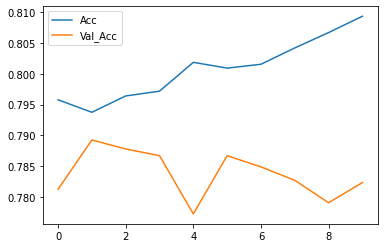

In [135]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label = "Acc")
plt.plot(history.history["val_accuracy"], label = "Val_Acc")
plt.legend()